In [1]:
import pandas as pd
from time import time
from joblib import Parallel, delayed
import numpy as np

In [2]:
def merge_sort(aList):
    if len(aList) <= 1:
        return aList

    mid = len(aList) // 2
    left = aList[:mid]
    right = aList[mid:]

    left = merge_sort(left)
    right = merge_sort(right)

    return list(merge(left, right))


def merge(left, right):
    sorted_list = []
    left_index = 0
    right_index = 0

    while left_index < len(left) and right_index < len(right):
        if left[left_index] <= right[right_index]:
            sorted_list.append(left[left_index])
            left_index += 1
        else:
            sorted_list.append(right[right_index])
            right_index += 1

    if left:
        sorted_list.extend(left[left_index:])
    if right:
        sorted_list.extend(right[right_index:])

    return sorted_list

In [3]:
## dataをn分割するやつ
def split_data(data,n):
    result=[]
    num=int(len(data)/n)
    for i in range(1,n):
        begin=num*(i-1)
        end=num*i
        result.append(data[begin:end])
    # 奇数用
    result.append(data[num*n:])
    return result

In [4]:
# i個のデータをマージする
def marge_data(data):
    num=len(data)/2
    result=data
    if (np.array(result).shape[0]==1):
        return result
    
    
    while(num!=1):
        dum=result
        result=[]
        num=len(dum)/2
        if (len(dum)%2!=0):
            dum.append([])
        for i in range(len(dum))[0::2]:
            result.append(merge(dum[i], dum[i+1]))
    return result[0]


In [5]:
datas=pd.read_csv("Parallel.txt",  header=None)
datas=list(datas[0])

In [6]:
result_time=[]
for i in range(2,21):
    start = time()
    data = split_data(datas,i)

    r = Parallel(n_jobs=i)( [delayed(merge_sort)(j) for j in data])

    
    marge_data(r)
    stop=float(time() - start)
    result_time.append(stop)
    print('{}秒かかりました'.format(stop))

6.908527135848999秒かかりました
5.742426872253418秒かかりました
6.554734945297241秒かかりました
6.663113832473755秒かかりました
6.967310190200806秒かかりました
7.082596063613892秒かかりました
7.219666242599487秒かかりました
7.379925966262817秒かかりました
7.685576915740967秒かかりました
7.577967166900635秒かかりました
7.668995141983032秒かかりました
7.729481935501099秒かかりました
7.863260984420776秒かかりました
7.86079216003418秒かかりました
7.832675933837891秒かかりました
8.306071996688843秒かかりました
8.313846826553345秒かかりました
8.220852136611938秒かかりました
8.07944107055664秒かかりました


In [10]:
result=[10.500969171524048,6.23]+result_time

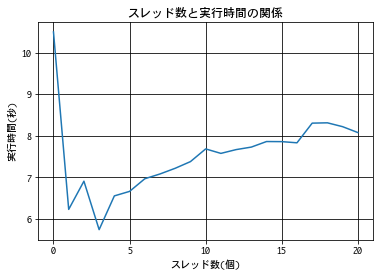

In [11]:
from matplotlib import pyplot as plt
plt.rcParams['font.family'] = 'Osaka'
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(result)
plt.title("スレッド数と実行時間の関係")
plt.xlabel("スレッド数(個)")
plt.ylabel("実行時間(秒)")
ax.set_xticks([0,5,10,15,20])
plt.grid(which='major',color='black',linestyle='-')